In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn import metrics
#from sklearn.linear_model import LinearRegression
#import warnings
#warnings.filterwarnings('ignore')

In [2]:
gd = pd.read_csv("general_data.csv")
sd = pd.read_csv("employee_survey_data.csv")
md = pd.read_csv("manager_survey_data.csv")
#fill Null values from survey with Zero
sd.fillna(value=0, inplace=True)
md.fillna(value=0, inplace=True)
#Join survey result with general data
gd=gd.join(sd, on=['EmployeeID'], how='inner', lsuffix='_caller', rsuffix='_other')
gd=gd.join(md, on=['EmployeeID'], how='inner', lsuffix='_caller', rsuffix='_other')

gd

,EmployeeID,EmployeeID_caller,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EmployeeID_other,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,EmployeeID_other,JobInvolvement,PerformanceRating
0,1,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,...,1,0,0,2,3.0,2.0,4.0,2,2,4
1,2,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,...,5,1,4,3,2.0,2.0,1.0,3,3,3
2,3,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,...,5,0,3,4,4.0,4.0,3.0,4,2,3
3,4,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,...,8,7,5,5,4.0,1.0,3.0,5,3,3
4,5,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,...,6,0,4,6,3.0,2.0,2.0,6,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,4405,4405,29,No,Travel_Rarely,Sales,4,3,Other,1,...,6,1,5,4406,4.0,1.0,3.0,4406,3,3
4405,4406,4406,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,...,3,0,2,4407,4.0,4.0,3.0,4407,2,3
4406,4407,4407,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,...,3,0,2,4408,1.0,3.0,3.0,4408,3,4
4407,4408,4408,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,...,4,1,2,4409,4.0,1.0,3.0,4409,2,3


In [3]:
print("Did not leave: ", gd.Attrition.value_counts()['No']/len(gd)*100,"%")
print("Left: ", gd.Attrition.value_counts()['Yes']/len(gd)*100,"%")

Did not leave:  83.87389430709912 %
Left:  16.126105692900886 %


In [4]:
print(gd.dtypes)

EmployeeID                   int64
EmployeeID_caller            int64
Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeID_caller            int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
EmployeeID_other             int64
EnvironmentSatisfaction    float64
JobSatisfaction     

# Performing EDA

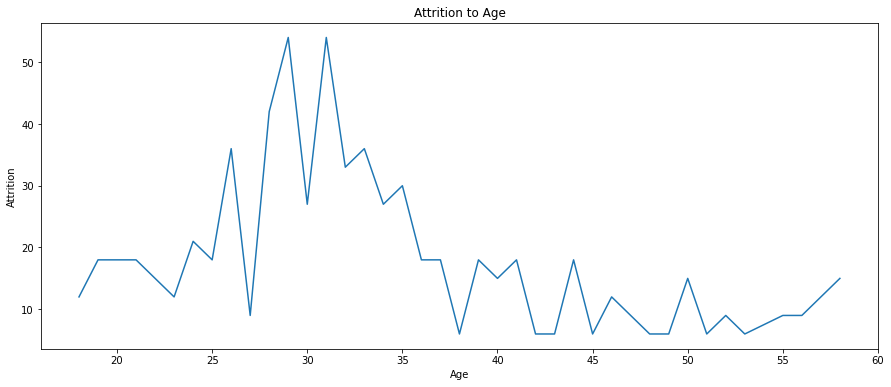

In [5]:
#Age to Attrition relationship
age_att=gd[gd['Attrition']== 'Yes'].groupby(["Age"])['Attrition'].count()
plt.figure(figsize=(16,4)) #sns level point max 
plt.title('Attrition to Age')
plt.xlabel('Age')
plt.ylabel('Attrition')
age_att.plot(figsize=(15, 6))
plt.show();

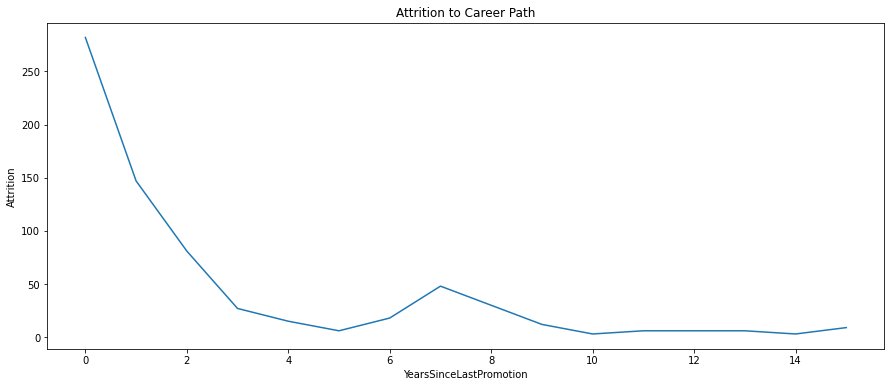

In [6]:
career_att=gd[(gd['Attrition'] == 'Yes') & (gd['YearsAtCompany'] >= 1)].groupby(["YearsSinceLastPromotion"])['Attrition'].count()
plt.figure(figsize=(16,4))
plt.title('Attrition to Career Path')
plt.xlabel('Years Since Last Promotion')
plt.ylabel('Attrition')
career_att.plot(figsize=(15, 6))
plt.show();

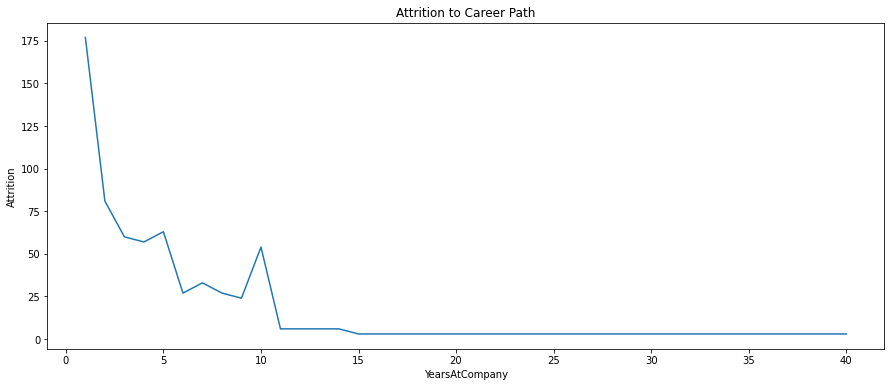

In [7]:
career_att=gd[(gd['Attrition'] == 'Yes') & (gd['YearsAtCompany'] >= 1)].groupby(["YearsAtCompany"])['Attrition'].count()
plt.figure(figsize=(16,4))
plt.title('Attrition to Career Path')
plt.xlabel('YearsAtCompany')
plt.ylabel('Attrition')
career_att.plot(figsize=(15, 6))
plt.show();

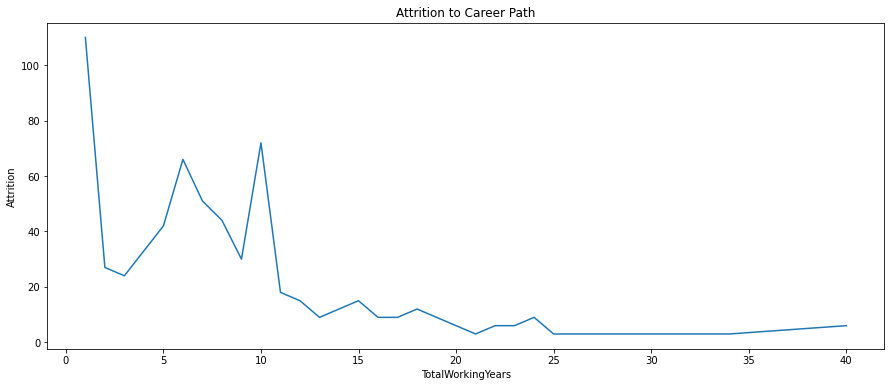

In [8]:
career_att=gd[(gd['Attrition'] == 'Yes') & (gd['YearsAtCompany'] >= 1)].groupby(["TotalWorkingYears"])['Attrition'].count()
plt.figure(figsize=(16,4))
plt.title('Attrition to Career Path')
plt.xlabel('TotalWorkingYears')
plt.ylabel('Attrition')
career_att.plot(figsize=(15, 6))
plt.show();

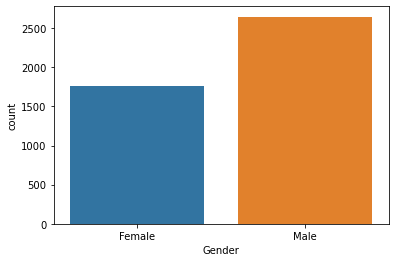

In [9]:
sns.countplot(x = "Gender",data=gd)
plt.show()

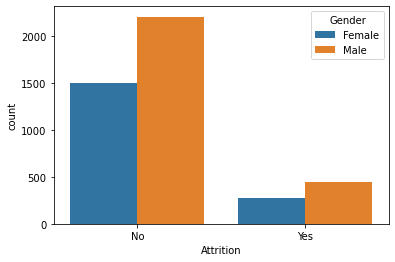

In [10]:
sns.countplot(x = "Attrition",data=gd,hue="Gender")
plt.show() 

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


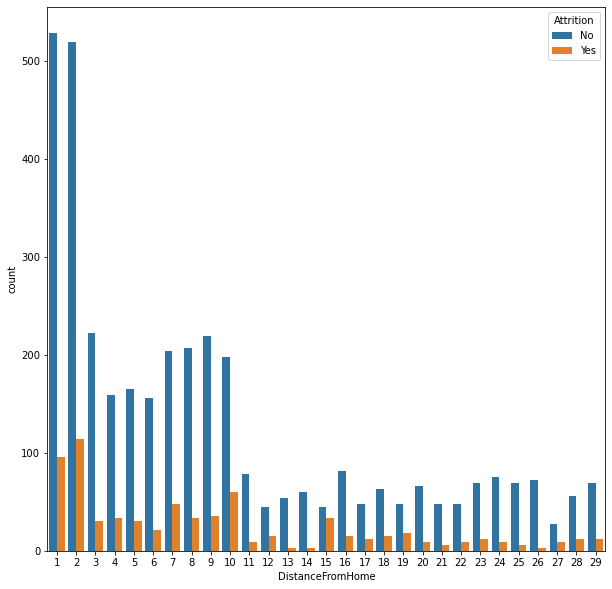

In [11]:
plt.figure(figsize=(10,10))
sns.countplot("DistanceFromHome",data=gd, hue = 'Attrition')
plt.show()

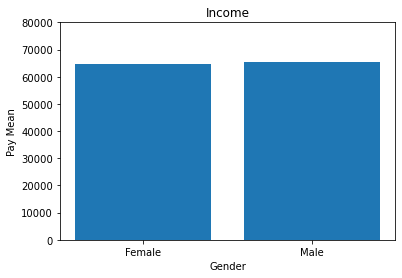

In [12]:
xs=gd.groupby(["Gender"])['MonthlyIncome'].mean()
plt.title('Income')
plt.xlabel('Gender')
plt.ylabel('Pay Mean')
plt.ylim([0,80000])
plt.bar(xs.index, xs)
plt.show();

In [13]:
Age18_21=gd[gd['Age']<21]
Age21_25=gd[(gd['Age']>=21) & (gd['Age']<25)]
Age25_35=gd[(gd['Age']>=25) & (gd['Age']<35)]
Age35_45=gd[(gd['Age']>=35) & (gd['Age']<45)]
Age45_55=gd[(gd['Age']>=45) & (gd['Age']<55)]
Age55_65=gd[(gd['Age']>=55)]
Age=['18-21', '21-25', '25-35', '35-45', '45-55', '55-65']
Income=[Age18_21['MonthlyIncome'].mean(), Age21_25['MonthlyIncome'].mean(), Age25_35['MonthlyIncome'].mean(), Age35_45['MonthlyIncome'].mean(), Age45_55['MonthlyIncome'].mean(), Age55_65['MonthlyIncome'].mean()]
d={'Age':Age,'Income':Income}
df=pd.DataFrame(data=d)

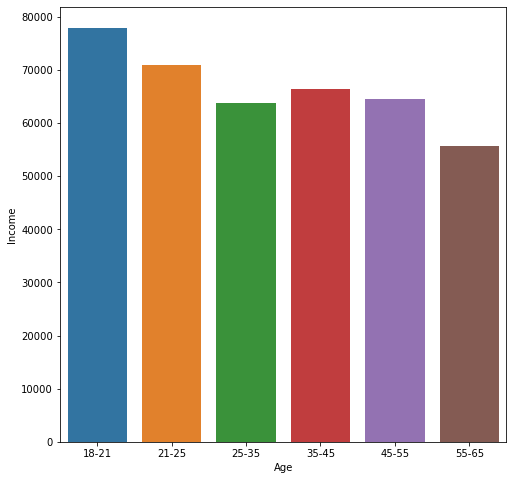

In [14]:
plt.figure(figsize=(8,8))
sns.barplot(x = "Age",data=df, y="Income")
plt.show()

In [15]:
# Age vs Attrition

Education to Attrition
1. 'Below College'
2. 'College'
3. 'Bachelor'
4. 'Master'
5. 'Doctor'

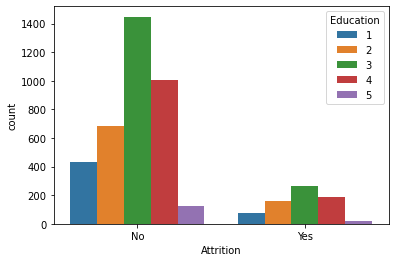

In [16]:
sns.countplot(x = "Attrition",data=gd,hue="Education")
plt.show()

# Regression



In [17]:
gd.isnull().sum()

EmployeeID                  0
EmployeeID_caller           0
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID_caller           0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           8
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EmployeeID_other            0
EnvironmentSatisfaction     0
JobSatisfaction             0
WorkLifeBalance             0
EmployeeID_other            0
JobInvolvement              0
PerformanceRating           0
dtype: int

In [18]:
gd.dropna()

,EmployeeID,EmployeeID_caller,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EmployeeID_other,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,EmployeeID_other,JobInvolvement,PerformanceRating
0,1,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,...,1,0,0,2,3.0,2.0,4.0,2,2,4
1,2,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,...,5,1,4,3,2.0,2.0,1.0,3,3,3
2,3,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,...,5,0,3,4,4.0,4.0,3.0,4,2,3
3,4,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,...,8,7,5,5,4.0,1.0,3.0,5,3,3
4,5,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,...,6,0,4,6,3.0,2.0,2.0,6,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,4405,4405,29,No,Travel_Rarely,Sales,4,3,Other,1,...,6,1,5,4406,4.0,1.0,3.0,4406,3,3
4405,4406,4406,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,...,3,0,2,4407,4.0,4.0,3.0,4407,2,3
4406,4407,4407,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,...,3,0,2,4408,1.0,3.0,3.0,4408,3,4
4407,4408,4408,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,...,4,1,2,4409,4.0,1.0,3.0,4409,2,3


In [19]:
gd.corr()

,EmployeeID,EmployeeID_caller,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID_caller,JobLevel,MonthlyIncome,NumCompaniesWorked,...,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EmployeeID_other,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,EmployeeID_other,JobInvolvement,PerformanceRating
EmployeeID,1.000000,1.000000,0.008520,-0.002010,-0.009716,NaN,1.000000,-0.003281,0.007427,-0.000692,...,0.003192,0.000157,0.008046,1.000000,0.004177,-0.000846,0.002877,1.000000,0.008743,-0.007062
EmployeeID_caller,1.000000,1.000000,0.008520,-0.002010,-0.009716,NaN,1.000000,-0.003281,0.007427,-0.000692,...,0.003192,0.000157,0.008046,1.000000,0.004177,-0.000846,0.002877,1.000000,0.008743,-0.007062
Age,0.008520,0.008520,1.000000,0.006790,-0.035713,NaN,0.008520,-0.002879,-0.044298,0.299369,...,0.311323,0.216498,0.202030,0.008520,-0.023115,-0.000857,0.027493,0.008520,0.020052,0.020111
DistanceFromHome,-0.002010,-0.002010,0.006790,1.000000,-0.008688,NaN,-0.002010,-0.037322,-0.021505,-0.013283,...,0.030518,0.002158,0.020881,-0.002010,-0.016940,0.033941,-0.029175,-0.002010,0.019570,0.011516
Education,-0.009716,-0.009716,-0.035713,-0.008688,1.000000,NaN,-0.009716,0.045747,0.006414,-0.016231,...,0.006040,0.022485,0.005332,-0.009716,0.027154,-0.017147,-0.008790,-0.009716,0.033090,-0.019005
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeID_caller,1.000000,1.000000,0.008520,-0.002010,-0.009716,NaN,1.000000,-0.003281,0.007427,-0.000692,...,0.003192,0.000157,0.008046,1.000000,0.004177,-0.000846,0.002877,1.000000,0.008743,-0.007062
JobLevel,-0.003281,-0.003281,-0.002879,-0.037322,0.045747,NaN,-0.003281,1.000000,0.047313,-0.009890,...,-0.064227,-0.060808,-0.055245,-0.003281,-0.019906,-0.039524,0.002723,-0.003281,-0.030775,-0.039976
MonthlyIncome,0.007427,0.007427,-0.044298,-0.021505,0.006414,NaN,0.007427,0.047313,1.000000,-0.020783,...,0.001110,0.065233,0.024378,0.007427,0.030249,-0.029137,0.015518,0.007427,-0.032233,0.016611
NumCompaniesWorked,-0.000692,-0.000692,0.299369,-0.013283,-0.016231,NaN,-0.000692,-0.009890,-0.020783,1.000000,...,-0.117484,-0.036600,-0.109369,-0.000692,-0.048565,-0.001720,-0.014541,-0.000692,0.028528,0.017585


In [20]:
gd

,EmployeeID,EmployeeID_caller,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EmployeeID_other,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,EmployeeID_other,JobInvolvement,PerformanceRating
0,1,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,...,1,0,0,2,3.0,2.0,4.0,2,2,4
1,2,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,...,5,1,4,3,2.0,2.0,1.0,3,3,3
2,3,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,...,5,0,3,4,4.0,4.0,3.0,4,2,3
3,4,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,...,8,7,5,5,4.0,1.0,3.0,5,3,3
4,5,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,...,6,0,4,6,3.0,2.0,2.0,6,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,4405,4405,29,No,Travel_Rarely,Sales,4,3,Other,1,...,6,1,5,4406,4.0,1.0,3.0,4406,3,3
4405,4406,4406,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,...,3,0,2,4407,4.0,4.0,3.0,4407,2,3
4406,4407,4407,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,...,3,0,2,4408,1.0,3.0,3.0,4408,3,4
4407,4408,4408,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,...,4,1,2,4409,4.0,1.0,3.0,4409,2,3


In [21]:
gdx=pd.DataFrame(gd)
gdx.to_csv('AttritionM2.csv',index=False)

# improved dataset

In [22]:
gd_reg = pd.read_csv('M2_Attrition.csv')
gd_reg

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,Gender,JobLevel,JobRole,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,Life Sciences,Female,1,Healthcare Representative,...,1.0,6,1,0,0,3,2,4,2,4
1,2,31,Yes,Travel_Frequently,Research & Development,10,Life Sciences,Female,1,Research Scientist,...,6.0,3,5,1,4,2,2,1,3,3
2,3,32,No,Travel_Frequently,Research & Development,17,Other,Male,4,Sales Executive,...,5.0,2,5,0,3,4,4,3,2,3
3,4,38,No,Non-Travel,Research & Development,2,Life Sciences,Male,3,Human Resources,...,13.0,5,8,7,5,4,1,3,3,3
4,5,32,No,Travel_Rarely,Research & Development,10,Medical,Male,1,Sales Executive,...,9.0,2,6,0,4,3,2,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,4405,29,No,Travel_Rarely,Sales,4,Other,Female,2,Human Resources,...,6.0,2,6,1,5,4,1,3,3,3
4405,4406,42,No,Travel_Rarely,Research & Development,5,Medical,Female,1,Research Scientist,...,10.0,5,3,0,2,4,4,3,2,3
4406,4407,29,No,Travel_Rarely,Research & Development,2,Medical,Male,1,Laboratory Technician,...,10.0,2,3,0,2,1,3,3,3,4
4407,4408,25,No,Travel_Rarely,Research & Development,25,Life Sciences,Male,2,Sales Executive,...,5.0,4,4,1,2,4,1,3,2,3


In [23]:
gd_reg.columns

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating'],
      dtype='object')

In [24]:
#ge_reg = gd[['Attrition','Age','BusinessTravel','Department','DistanceFromHome','']]

In [25]:
gd_reg_cat = gd[['Attrition', 'BusinessTravel', 'Department',
       'EducationField', 'Gender', 'JobRole',
       'MaritalStatus']].copy()
gd_reg_cat.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,No,Travel_Rarely,Sales,Life Sciences,Female,Healthcare Representative,Married
1,Yes,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Single
2,No,Travel_Frequently,Research & Development,Other,Male,Sales Executive,Married
3,No,Non-Travel,Research & Development,Life Sciences,Male,Human Resources,Married
4,No,Travel_Rarely,Research & Development,Medical,Male,Sales Executive,Single


In [26]:
Num_val = {'Yes':1, 'No':0}
gd_reg_cat['Attrition'] = gd_reg_cat["Attrition"].apply(lambda x: Num_val[x])
gd_reg_cat.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,0,Travel_Rarely,Sales,Life Sciences,Female,Healthcare Representative,Married
1,1,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Single
2,0,Travel_Frequently,Research & Development,Other,Male,Sales Executive,Married
3,0,Non-Travel,Research & Development,Life Sciences,Male,Human Resources,Married
4,0,Travel_Rarely,Research & Development,Medical,Male,Sales Executive,Single


In [27]:
gd_reg_cat = pd.get_dummies(gd_reg_cat)
gd_reg_cat.head()

,Attrition,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [28]:
gd_reg_cat.count()

Attrition                            4409
BusinessTravel_Non-Travel            4409
BusinessTravel_Travel_Frequently     4409
BusinessTravel_Travel_Rarely         4409
Department_Human Resources           4409
Department_Research & Development    4409
Department_Sales                     4409
EducationField_Human Resources       4409
EducationField_Life Sciences         4409
EducationField_Marketing             4409
EducationField_Medical               4409
EducationField_Other                 4409
EducationField_Technical Degree      4409
Gender_Female                        4409
Gender_Male                          4409
JobRole_Healthcare Representative    4409
JobRole_Human Resources              4409
JobRole_Laboratory Technician        4409
JobRole_Manager                      4409
JobRole_Manufacturing Director       4409
JobRole_Research Director            4409
JobRole_Research Scientist           4409
JobRole_Sales Executive              4409
JobRole_Sales Representative      

In [29]:
#gd_reg_cat.apply(pd.Series.value_counts)
pd.set_option("display.max_columns", None)
gd_reg_cat.apply(pd.Series.value_counts)

,Attrition,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,3698,3959,3578,1281,4220,1527,3071,4328,2591,3932,3018,4163,4013,2645,1764,4016,4253,3633,4103,3974,4169,3533,3431,4160,3429,2390,2999
1,711,450,831,3128,189,2882,1338,81,1818,477,1391,246,396,1764,2645,393,156,776,306,435,240,876,978,249,980,2019,1410


In [30]:
gd_reg_cat = gd_reg_cat.drop(['BusinessTravel_Travel_Rarely','Department_Research & Development','Gender_Male','JobRole_Sales Executive','MaritalStatus_Married'],axis=1)
gd_reg_cat.head()

,Attrition,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,Department_Human Resources,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Single
0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


gd_reg_num = gd[['Attrition', 'BusinessTravel', 'Department',
       'EducationField', 'Gender', 'JobRole',
       'MaritalStatus']].copy()
gd_reg_num.head()

In [31]:
gd_reg_num = gd[['Age',
       'DistanceFromHome','JobLevel',
       'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating']].copy()
gd_reg_num.head()

,Age,DistanceFromHome,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,6,1,131160,1.0,11,0,1.0,6,1,0,0,3.0,2.0,4.0,2,4
1,31,10,1,41890,0.0,23,1,6.0,3,5,1,4,2.0,2.0,1.0,3,3
2,32,17,4,193280,1.0,15,3,5.0,2,5,0,3,4.0,4.0,3.0,2,3
3,38,2,3,83210,3.0,11,3,13.0,5,8,7,5,4.0,1.0,3.0,3,3
4,32,10,1,23420,4.0,12,2,9.0,2,6,0,4,3.0,2.0,2.0,3,3


In [32]:
gd_reg_final = pd.concat([gd_reg_cat, gd_reg_num], axis=1)
gd_reg_final.head()

,Attrition,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,Department_Human Resources,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Single,Age,DistanceFromHome,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,51,6,1,131160,1.0,11,0,1.0,6,1,0,0,3.0,2.0,4.0,2,4
1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,31,10,1,41890,0.0,23,1,6.0,3,5,1,4,2.0,2.0,1.0,3,3
2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,32,17,4,193280,1.0,15,3,5.0,2,5,0,3,4.0,4.0,3.0,2,3
3,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,38,2,3,83210,3.0,11,3,13.0,5,8,7,5,4.0,1.0,3.0,3,3
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,32,10,1,23420,4.0,12,2,9.0,2,6,0,4,3.0,2.0,2.0,3,3


In [33]:
gd_reg_final.isnull().sum()

Attrition                             0
BusinessTravel_Non-Travel             0
BusinessTravel_Travel_Frequently      0
Department_Human Resources            0
Department_Sales                      0
EducationField_Human Resources        0
EducationField_Life Sciences          0
EducationField_Marketing              0
EducationField_Medical                0
EducationField_Other                  0
EducationField_Technical Degree       0
Gender_Female                         0
JobRole_Healthcare Representative     0
JobRole_Human Resources               0
JobRole_Laboratory Technician         0
JobRole_Manager                       0
JobRole_Manufacturing Director        0
JobRole_Research Director             0
JobRole_Research Scientist            0
JobRole_Sales Representative          0
MaritalStatus_Divorced                0
MaritalStatus_Single                  0
Age                                   0
DistanceFromHome                      0
JobLevel                              0


In [34]:
gd_reg_final_done=gd_reg_final.dropna()
gd_reg_final_done.isna().sum()

Attrition                            0
BusinessTravel_Non-Travel            0
BusinessTravel_Travel_Frequently     0
Department_Human Resources           0
Department_Sales                     0
EducationField_Human Resources       0
EducationField_Life Sciences         0
EducationField_Marketing             0
EducationField_Medical               0
EducationField_Other                 0
EducationField_Technical Degree      0
Gender_Female                        0
JobRole_Healthcare Representative    0
JobRole_Human Resources              0
JobRole_Laboratory Technician        0
JobRole_Manager                      0
JobRole_Manufacturing Director       0
JobRole_Research Director            0
JobRole_Research Scientist           0
JobRole_Sales Representative         0
MaritalStatus_Divorced               0
MaritalStatus_Single                 0
Age                                  0
DistanceFromHome                     0
JobLevel                             0
MonthlyIncome            

# Performing Regression

In [35]:
from sklearn.model_selection import train_test_split

target = gd_reg_final_done['Attrition'] #y variable

features = gd_reg_final_done.drop('Attrition', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)

In [36]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [37]:
from sklearn.metrics import accuracy_score
test_pred = model.predict(X_test)
accuracy_score(y_test, test_pred)

0.9908779931584949

<AxesSubplot:>

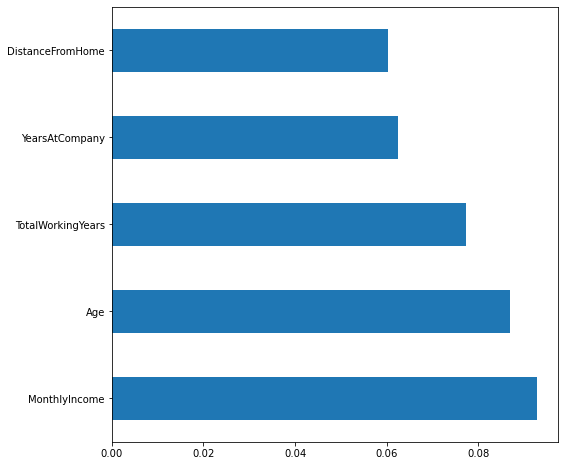

In [38]:
plt.figure(figsize=(8,8))
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances = feat_importances.nlargest(5)
feat_importances.plot(kind='barh')

<AxesSubplot:>

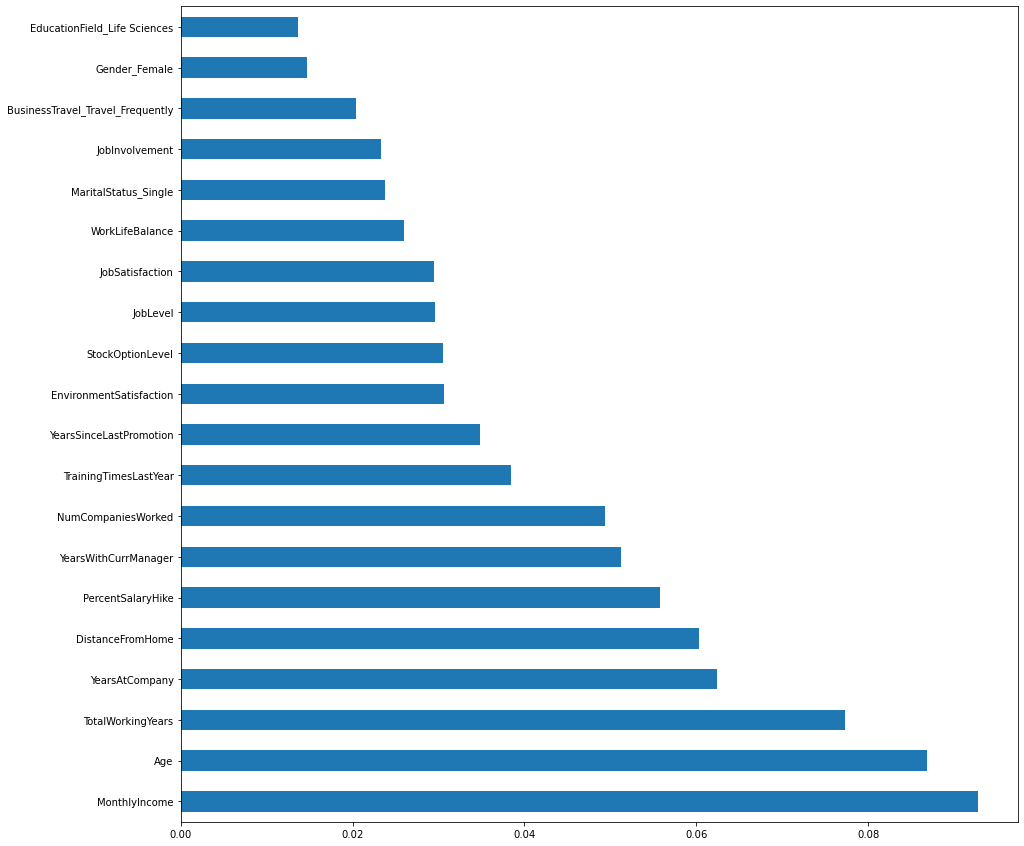

In [39]:
plt.figure(figsize=(15,15))
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='barh')

<AxesSubplot:>

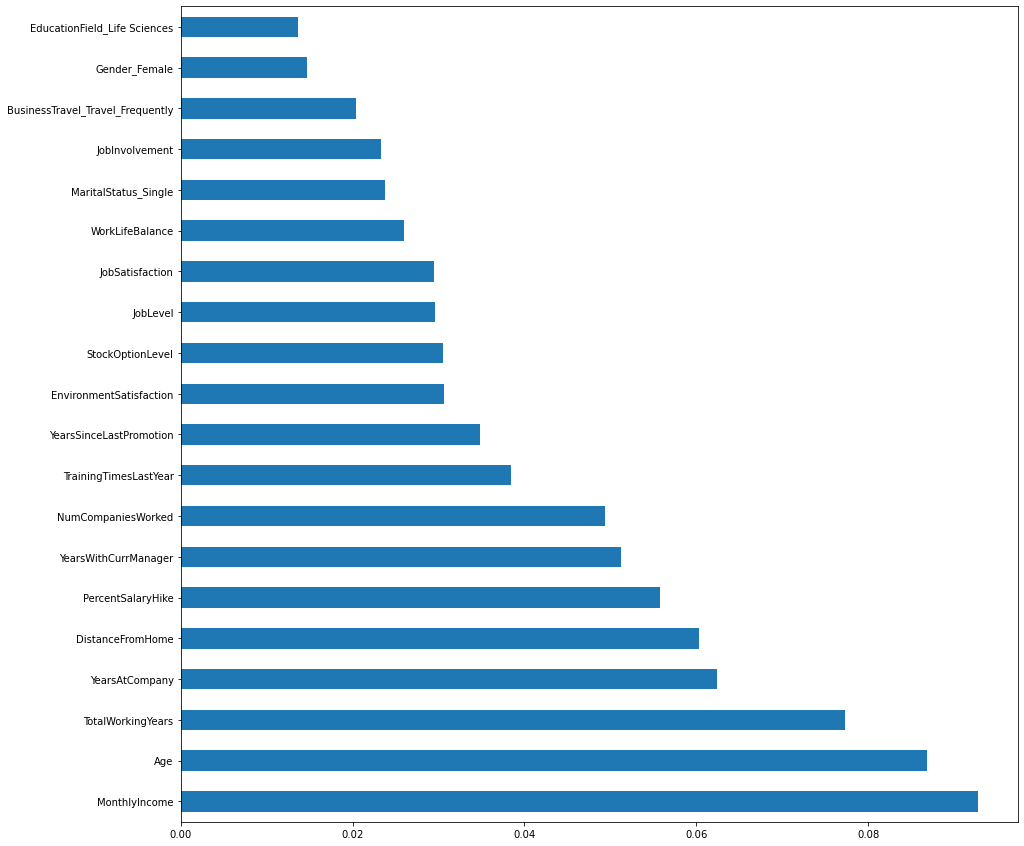

In [40]:
plt.figure(figsize=(15,15))
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='barh')